## Multi-Class Text Clasification of make-up cosmetics

Multi- Class Text Classification applied to categorization of the description of makeup products. 

In this project, I would like to demonstrate how one can do the text classification by using python, scikit-learn and NLTK library. These are real description about make-up products. Each description has been labeled with a specific product, therefore, this is a supervised text classification problem. With the goal to classify future product based on its description, we used different machine learning algorithms can make more accurate predictions. The following classification algorithms have been used: Logistic Regression, Multinomial Naive Bayes and Linear Support Vector Machine (LinearSVM).


### Importing packages and loading data

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [3]:
df = pd.read_csv('C:\Python Scripts\API_products\products_final.csv', header=0,index_col=0)
df.head()

,brand,category,currency,description,id,name,price,price_sign,product_type,rating,tag_list
0,colourpop,pencil,CAD,Lippie Pencil A long-wearing and high-intensit...,1048,Lippie Pencil,5.0,$,lip_liner,NaN,"['Vegan', 'cruelty free']"
1,colourpop,lipstick,CAD,Blotted Lip Sheer matte lipstick that creates ...,1047,Blotted Lip,5.5,$,lipstick,NaN,"['Vegan', 'cruelty free']"
2,colourpop,lipstick,CAD,"Lippie Stix Formula contains Vitamin E, Mango,...",1046,Lippie Stix,5.5,$,lipstick,NaN,"['Vegan', 'cruelty free']"
3,colourpop,liquid,CAD,"Developed for the Selfie Age, our buildable fu...",1045,No Filter Foundation,12.0,$,foundation,NaN,"['Vegan', 'cruelty free']"
4,boosh,lipstick,CAD,All of our products are free from lead and hea...,1044,Lipstick,26.0,$,lipstick,NaN,"['Organic', 'Chemical Free']"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 931 entries, 0 to 930
Data columns (total 11 columns):
brand           919 non-null object
category        507 non-null object
currency        368 non-null object
description     906 non-null object
id              931 non-null int64
name            931 non-null object
price           917 non-null float64
price_sign      368 non-null object
product_type    931 non-null object
rating          340 non-null float64
tag_list        931 non-null object
dtypes: float64(2), int64(1), object(8)
memory usage: 87.3+ KB


### Data Engineering

In [5]:
text_df = df[['product_type', 'description']]
text_df.head()

,product_type,description
0,lip_liner,Lippie Pencil A long-wearing and high-intensit...
1,lipstick,Blotted Lip Sheer matte lipstick that creates ...
2,lipstick,"Lippie Stix Formula contains Vitamin E, Mango,..."
3,foundation,"Developed for the Selfie Age, our buildable fu..."
4,lipstick,All of our products are free from lead and hea...


In [6]:
text_df['description'][3]

'Developed for the Selfie Age, our buildable full coverage, natural matte foundation delivers flawless looking skin from day-to-night. The oil-free, lightweight formula blends smoothly and is easily customizable to create the coverage you want. Build it up or sheer it out, it was developed with innovative soft-blurring pigments to deliver true color while looking and feeling natural. The lockable pump is easy to use and keeps your routine mess-free! As always, 100% cruelty-free and vegan.'

In [7]:
text_df.shape

(931, 2)

In [8]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 931 entries, 0 to 930
Data columns (total 2 columns):
product_type    931 non-null object
description     906 non-null object
dtypes: object(2)
memory usage: 61.8+ KB


In [9]:
text_df.isnull().sum()

product_type     0
description     25
dtype: int64

 Delete rows with missing values:

In [10]:
text_df.dropna(subset=['description'], inplace=True)

C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
text_df.isnull().sum()

product_type    0
description     0
dtype: int64

In [12]:
text_df.shape

(906, 2)

Data type change:

In [13]:
text_df['description'] = text_df['description'].astype(str)

C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Lenght of characters

In [14]:
text_df['length'] = text_df['description'].apply(len)
text_df.head()

C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,product_type,description,length
0,lip_liner,Lippie Pencil A long-wearing and high-intensit...,232
1,lipstick,Blotted Lip Sheer matte lipstick that creates ...,146
2,lipstick,"Lippie Stix Formula contains Vitamin E, Mango,...",188
3,foundation,"Developed for the Selfie Age, our buildable fu...",492
4,lipstick,All of our products are free from lead and hea...,357


In [15]:
text_df.product_type.unique()

array(['lip_liner', 'lipstick', 'foundation', 'eyeliner', 'eyeshadow',
       'blush', 'bronzer', 'mascara', 'eyebrow', 'nail_polish'],
      dtype=object)

In [16]:
text_df['length'].describe()

count     906.000000
mean      645.596026
std       824.084257
min         9.000000
25%       217.000000
50%       356.500000
75%       722.250000
max      5528.000000
Name: length, dtype: float64

#### Grouping data to a smaller number of categories:

In [17]:
text_df.product_type.value_counts()

foundation     159
lipstick       148
eyeliner       145
mascara         91
eyeshadow       86
blush           75
bronzer         69
nail_polish     60
eyebrow         45
lip_liner       28
Name: product_type, dtype: int64

In [18]:
text_df.loc[text_df['product_type'].isin(['lipstick','lip_liner']),'product_type'] = 'lipstick'
text_df.loc[text_df['product_type'].isin(['blush','bronzer']),'product_type'] = 'contour'
text_df.loc[text_df['product_type'].isin(['eyeliner','eyeshadow','mascara','eyebrow']),'product_type'] = 'eye_makeup'

C:\Users\PC\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [19]:
text_df.product_type.value_counts()

eye_makeup     367
lipstick       176
foundation     159
contour        144
nail_polish     60
Name: product_type, dtype: int64

We have received a five group of categories:  Eye makeup, Lipstick, Foundation, Contour and Nail polish.

### Data visualization

##### The length of characters in all categories:
Histogram of description length.

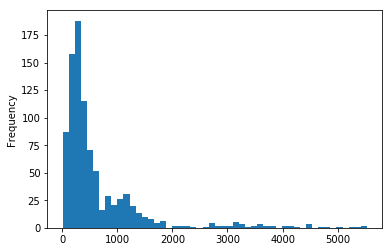

In [20]:
text_df['length'].plot(bins=50, kind='hist');

##### The length of characters divided into categories:
Histogram of description length of each categories.

The largest description has almost 200 characters, some of them are very short.

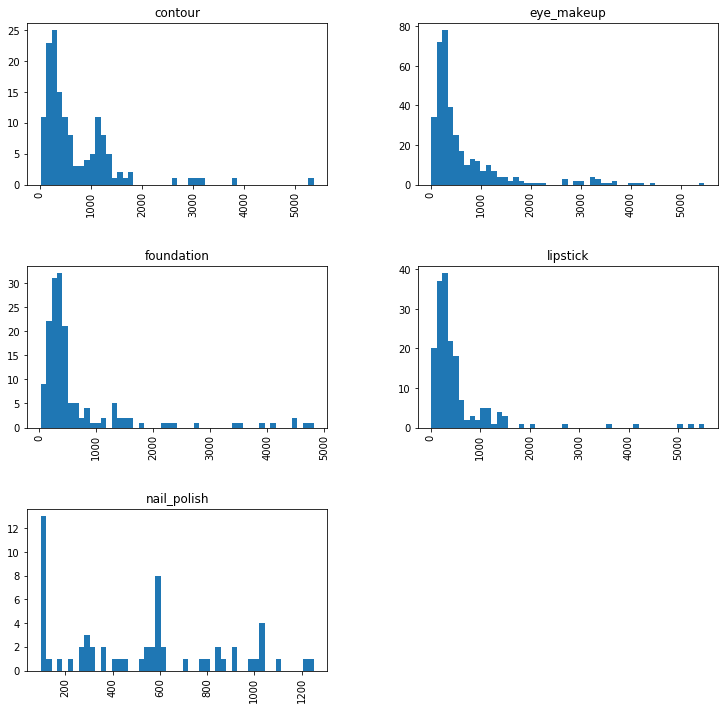

In [21]:
text_df.hist(column='length', by='product_type', bins=50,figsize=(12,12));

### Change to numeric

In [22]:
type_mapping = {
    'eye_makeup': 1,
    'lipstick': 2,
    'foundation': 3,
    'contour': 4,
    'nail_polish': 5}

In [23]:
text_df['product_type'] = text_df['product_type'].map(type_mapping)
text_df.head()

C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,product_type,description,length
0,2,Lippie Pencil A long-wearing and high-intensit...,232
1,2,Blotted Lip Sheer matte lipstick that creates ...,146
2,2,"Lippie Stix Formula contains Vitamin E, Mango,...",188
3,3,"Developed for the Selfie Age, our buildable fu...",492
4,2,All of our products are free from lead and hea...,357


In [24]:
text_df.product_type.value_counts()

1    367
2    176
3    159
4    144
5     60
Name: product_type, dtype: int64

The description of five product type:

In [25]:
text_df.describe()

,product_type,length
count,906.000000,906.000000
mean,2.286976,645.596026
std,1.316024,824.084257
min,1.000000,9.000000
25%,1.000000,217.000000
50%,2.000000,356.500000
75%,3.000000,722.250000
max,5.000000,5528.000000


In [26]:
text_df.groupby('product_type').describe()

length                                                        \
              count        mean         std   min     25%    50%      75%   
product_type                                                                
1             367.0  668.209809  845.238743  14.0  216.00  341.0   791.50   
2             176.0  560.017045  831.868489   9.0  199.25  310.5   541.50   
3             159.0  683.937107  939.505450  22.0  240.00  364.0   580.50   
4             144.0  704.097222  759.401276  15.0  236.50  403.5  1088.50   
5              60.0  516.300000  341.538955  95.0  215.25  546.5   789.75   

                      
                 max  
product_type          
1             5470.0  
2             5528.0  
3             4818.0  
4             5362.0  
5             1252.0

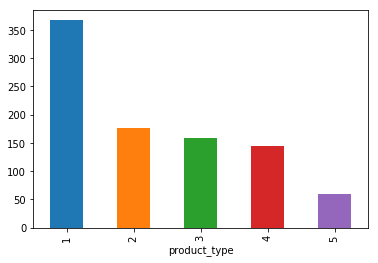

In [27]:
text_df.groupby('product_type').description.count().plot.bar(ylim=0)
plt.show()

One can see that products from the first group (eye makeup) is the largest one. It is over two times larger than in the second group (lipstick).

## Text Pre-processing

In this step we have to remove punctuation, stop words, bad characters and so on. The second step is aimed to convertion all of the words to lower case and then stemmed them using the Porter Stemmer in the NLTK package.

### Removing punctions
The function to remove punctuation:

In [28]:
def remove_punctuation(description):
    table = str.maketrans('', '', string.punctuation)
    return description.translate(table)

Apply the function to each examples:

In [29]:
text_df['description'] = text_df['description'].apply(remove_punctuation)
text_df.head()

C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,product_type,description,length
0,2,Lippie Pencil A longwearing and highintensity ...,232
1,2,Blotted Lip Sheer matte lipstick that creates ...,146
2,2,Lippie Stix Formula contains Vitamin E Mango A...,188
3,3,Developed for the Selfie Age our buildable ful...,492
4,2,All of our products are free from lead and hea...,357


### Stop words

First we extracting the stopwords from nltk library, then we build function to remove stop words:

In [30]:
# Show some stop words
stop = stopwords.words('english')
stop[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [31]:
def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(text)

In [32]:
text_df['description'] = text_df['description'].apply(remove_stopwords)
text_df.head()

C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,product_type,description,length
0,2,lippie pencil longwearing highintensity lip pe...,232
1,2,blotted lip sheer matte lipstick creates perfe...,146
2,2,lippie stix formula contains vitamin e mango a...,188
3,3,developed selfie age buildable full coverage n...,492
4,2,products free lead heavy metals parabens phtha...,357


In [33]:
text_df['description'][0]

'lippie pencil longwearing highintensity lip pencil glides easily prevents feathering many lippie stix coordinating lippie pencil designed compliment perfectly feel free mix match'

### Stemming

Stemming operation bundles together words of same root. E.g. stem operation bundles “fishing”,  and “fished” into a common "fish".

The function to carry out stemming operation:

In [34]:
porter = PorterStemmer()

def stemmer(stem_text):
    stem_text = [porter.stem(word) for word in stem_text.split()]
    return " ".join(stem_text)


In [35]:
text_df['description'] = text_df['description'].apply(stemmer)
text_df.head()

C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,product_type,description,length
0,2,lippi pencil longwear highintens lip pencil gl...,232
1,2,blot lip sheer matt lipstick creat perfect pop...,146
2,2,lippi stix formula contain vitamin e mango avo...,188
3,3,develop selfi age buildabl full coverag natur ...,492
4,2,product free lead heavi metal paraben phthalat...,357


In [36]:
text_df['description'][1]

'blot lip sheer matt lipstick creat perfect popsicl pout formula lightweight matt buildabl light medium coverag'

### Pos Tagging

To get the deeper insight to the way in which that word is used in speech, the Part of speech (POS) tagging method has been used. There are eight primary parts of speech and they each have a corresponding tag. The NLTK libary has a method to perform POS tagging. 

The example of Pos Tagging on analyzed data set is presented below: 

In [37]:
tokens = text_df['description'][0]

nltk.pos_tag(word_tokenize(tokens))

[('lippi', 'JJ'),
 ('pencil', 'NN'),
 ('longwear', 'JJ'),
 ('highintens', 'NNS'),
 ('lip', 'VBP'),
 ('pencil', 'NN'),
 ('glide', 'NN'),
 ('easili', 'FW'),
 ('prevent', 'NN'),
 ('feather', 'NN'),
 ('mani', 'NN'),
 ('lippi', 'NN'),
 ('stix', 'NN'),
 ('coordin', 'NN'),
 ('lippi', 'NN'),
 ('pencil', 'NN'),
 ('design', 'NN'),
 ('compliment', 'NN'),
 ('perfectli', 'NN'),
 ('feel', 'VB'),
 ('free', 'JJ'),
 ('mix', 'NN'),
 ('match', 'NN')]

### Bag of words

To run machine learning algorithms we need to convert the text files into numerical feature vectors. We will use bag of words model for our analysis. In general we segment each text file into words  and count of times each word occurs in each document and finally assign each word an integer id. Each unique word in our dictionary will correspond to a feature (descriptive feature).

More precisely we will convert our text documents to a matrix of token counts (CountVectorizer), then transform a count matrix to a normalized tf-idf representation (tf-idf transformer). 


#### CountVectorizer 

In [39]:
vectorizer = CountVectorizer()
vectorizer.fit(text_df['description'])
vector = vectorizer.transform(text_df['description'])

In [40]:
print(vector.shape)
print(vector.toarray())

(906, 5891)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#### TF-IDF
Term Frequency–Inverse Document Frequency

In [41]:
# extract the tfid representation matrix of the text data
tfidf_converter = TfidfTransformer()
X_tfidf = tfidf_converter.fit_transform(vector).toarray()
X_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Spliting the data into train and test sets:

In [42]:
X = X_tfidf
y = text_df['product_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

In [43]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((679, 5891), (227, 5891), (679,), (227,))

### Models

We used the Multi-Classification models.

The classification models evaluated are:
- Logistic Regression,
- Linear Support Vector Machine,
- Multinomial Naive Bayes.


#### Logistic Regression

We build and train Logistic Regression model:

In [44]:
model_log = LogisticRegression()
model_log.fit(X_train, y_train)

C:\Users\PC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
ytest = np.array(y_test)
pred = model_log.predict(X_test)

The confusion matrix and classification report(precision, recall, F1-score):

In [46]:
print('accuracy %s' % accuracy_score(pred, y_test))
print(classification_report(ytest, pred))
print(confusion_matrix(ytest, pred))

accuracy 0.9251101321585903
              precision    recall  f1-score   support

           1       0.91      0.99      0.95        98
           2       0.95      0.91      0.93        46
           3       0.89      0.86      0.87        28
           4       0.94      0.86      0.90        37
           5       1.00      0.83      0.91        18

    accuracy                           0.93       227
   macro avg       0.94      0.89      0.91       227
weighted avg       0.93      0.93      0.92       227

[[97  0  1  0  0]
 [ 4 42  0  0  0]
 [ 2  0 24  2  0]
 [ 1  2  2 32  0]
 [ 3  0  0  0 15]]


The model, which was trained on the development set, demonstrated that accuracy is equal to 0.93 on the evaluation set.

#### Pipeline

We build a pipeline. We can write less code and do all of the above, by building a pipeline as follows.

To make the vectorizer => transformer => classifier easier to work with, we will use Pipeline class in Scilkit-Learn . This kind of hyper-parameters as n-grams range, IDF usage, TF-IDF normalization type and Naive Bayes alpha were tunned using grid search. 

Spliting the data into train and test sets:

In [47]:
X = text_df['description']
y = text_df['product_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

#### Linear Support Vector Machine

In [48]:
svc = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf',LinearSVC()),
               ])

svc.fit(X_train, y_train)

ytest = np.array(y_test)
y_pred = svc.predict(X_test)

In [49]:
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(ytest, y_pred))

accuracy 0.9383259911894273
              precision    recall  f1-score   support

           1       0.97      0.98      0.97        98
           2       0.98      0.93      0.96        46
           3       0.89      0.86      0.87        28
           4       0.83      0.92      0.87        37
           5       1.00      0.89      0.94        18

    accuracy                           0.94       227
   macro avg       0.93      0.92      0.92       227
weighted avg       0.94      0.94      0.94       227



The model, which was trained on the development set, demonstrated that accuracy is equal to 0.94 on the evaluation set.

#### Naive Bayes Classifier for Multinomial Models

In [61]:
nbc = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('mnb',MultinomialNB()),
               ])

nbc.fit(X_train, y_train)

ytest = np.array(y_test)

pred_y = nbc.predict(X_test)


In [62]:
print('accuracy %s' % accuracy_score(pred_y, y_test))
print(classification_report(ytest, pred_y))

accuracy 0.7709251101321586
              precision    recall  f1-score   support

           1       0.67      1.00      0.80        98
           2       0.97      0.63      0.76        46
           3       0.91      0.71      0.80        28
           4       0.95      0.54      0.69        37
           5       1.00      0.44      0.62        18

    accuracy                           0.77       227
   macro avg       0.90      0.67      0.73       227
weighted avg       0.83      0.77      0.76       227



The model, which was trained on the development set, demonstrated that accuracy is equal to 0.77 on the evaluation set. This is the worst result obtained from all of used models.

### Model evaluation

#### GridSearch

Tuning Multinomial Naive Bayes Classifier:

In [1]:
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False),
              'mnb__alpha': (1e-2, 1e-3),
}

In [64]:
gs_nb = GridSearchCV(nbc, parameters, n_jobs=-1)
gs_nb = gs_nb.fit(X_train, y_train)

C:\Users\PC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [65]:
gs_nb.best_score_

0.8910162002945509

In [66]:
gs_nb.best_params_

{'mnb__alpha': 0.01, 'tfidf__use_idf': False, 'vect__ngram_range': (1, 1)}

In [67]:
print(classification_report(ytest, gs_nb.predict(X_test), digits=4))

              precision    recall  f1-score   support

           1     0.9381    0.9286    0.9333        98
           2     0.9318    0.8913    0.9111        46
           3     0.8276    0.8571    0.8421        28
           4     0.8462    0.8919    0.8684        37
           5     0.8889    0.8889    0.8889        18

    accuracy                         0.9031       227
   macro avg     0.8865    0.8916    0.8888       227
weighted avg     0.9043    0.9031    0.9035       227



The accuracy has now increased to 0,90 for the Naive Bayes Classifier. According to the grid search results the best found parameters set are the following: mnb__alpha=0.01, tfidf__use_idf=False, vect__ngram_range=(1, 1).

### Conclusion

This project was aimed to the text classification by using python, scikit-learn and NLTK library. We started with the data engineering and text pre-processing, which cover the remove punctuation, stop words and stemming operation as well. Next we used bag of words model to convert the text files into numerical feature vectors. Finally we started training 3 different  Multi-Classification models, we choosed one of them (Naive Bayes - NB) and applied further evaluation for it. By using Grid Search for NB classifier we got the accuracy of 0.90 but it was smaller than the other two models (Logistic Regression and Linear SVM) without the evaluation. The best accuracy was obtained for the Linear SVM model (0.94) and was not much bigger than Logistic Regression model (0.93).
